# 1. | Introduction

Exploring the Earthquake Dataset: [Significant Earthquakes, 1900-Present](https://www.kaggle.com/datasets/usamabuttar/significant-earthquakes)

The study of earthquakes is crucial for understanding the complex processes that shape our planet. The occurrence of earthquakes can cause significant damage to infrastructure and property, as well as pose a threat to human life. In this notebook, we will explore a comprehensive dataset on global earthquakes from the past century.

This dataset contains information on over 90,000 earthquakes with a magnitude of 5 or greater that occurred since 1900. We will examine the spatial and temporal distribution of these earthquakes and analyze their magnitude and depth. By visualizing the data in different ways, we hope to gain insights into the patterns and trends that can help us better understand these natural phenomena.

Join us as we delve into the world of seismology and uncover the secrets of earthquake activity around the globe.

# 2. | Preparing Notebook

Installing and importing libraries, preparing the notebook settings and color palettes that will be used in this notebook.

In [1]:
!pip install -q basemap pillow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# 3. | Reading Dataset

**Here's an explanation of each column in the USGS earthquake data:**

* **time:** The time of the earthquake, reported as the number of milliseconds since the Unix epoch (January 1, 1970, 00:00:00 UTC).
* **latitude:** The latitude of the earthquake's epicenter, reported in decimal degrees.
* **longitude:** The longitude of the earthquake's epicenter, reported in decimal degrees.
* **depth:** The depth of the earthquake, reported in kilometers.
* **mag:** The magnitude of the earthquake, reported on various magnitude scales (see magType column below).
* **magType:** The magnitude type used to report the earthquake magnitude (e.g. "mb", "ml", "mw").
* **nst:** The total number of seismic stations used to calculate the earthquake location and magnitude.
* **gap:** The largest azimuthal gap between azimuthally adjacent stations (in degrees).
* **dmin:** The distance to the nearest station in degrees.
* **rms:** The root-mean-square of the residuals of the earthquake's hypocenter location.
* **net:** The ID of the seismic network used to locate the earthquake.
* **id:** A unique identifier for the earthquake event.
* **updated:** The time when the earthquake event was most recently updated in the catalog, reported as the number of milliseconds since the Unix epoch.
* **place:** A human-readable description of the earthquake's location.
* **type:** The type of seismic event (e.g. "earthquake", "quarry blast", "explosion").
* **horizontalError:** The horizontal error, in kilometers, of the location reported in the latitude and longitude columns.
* **depthError:** The depth error, in kilometers, of the depth column.
* **magError:** The estimated standard error of the reported earthquake magnitude.
* **magNst:** The number of seismic stations used to calculate the earthquake magnitude.
* **status:** The status of the earthquake event in the USGS earthquake catalog (e.g. "reviewed", "automatic").
* **locationSource:** The ID of the agency or network that provided the earthquake location.
* **magSource:** The ID of the agency or network that provided the earthquake magnitude.

In [3]:
df = pd.read_csv('Significant_Earthquakes.csv', index_col=0)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1900-10-09T12:25:00.000Z,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,NaN,ushis,ushis391,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1901-03-03T07:45:00.000Z,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,NaN,ushis,ushis393,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,1901-07-26T22:20:00.000Z,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,NaN,ushis,ushis395,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,1901-12-30T22:34:00.000Z,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,NaN,ushis,ushis397,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,1902-01-01T05:20:30.000Z,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,NaN,ushis,ushis400,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


# 4. | Global Earthquakes with Magnitude above 5 since 1900

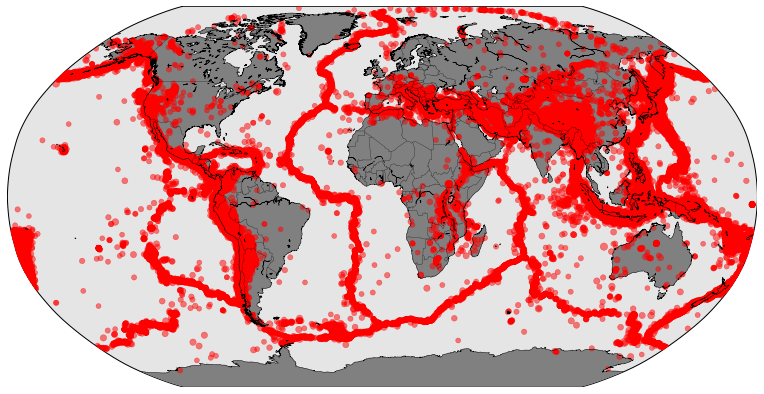

In [4]:
plt.figure(figsize=(14, 7))

# create a new map
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=0)

# draw coastlines, country boundaries, and fill the continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray')

# convert latitude and longitude to map coordinates
x, y = map(df["longitude"].values, df["latitude"].values)

# plot the earthquake data
map.scatter(x, y, s=df["mag"].values**2, c='red', alpha=0.5)

# show the map
plt.show()

This map displays every earthquake that has occured around the globe with a magnitude of 5 or above since 1900. Each point on the map represent the location of the earthquake which is plotted based on their epicenter coordinates. The map clearly shows that earthquakes are not evenly distributed around the world and follow a specific pattern, with regions like the Pacific Ring of Fire and the Himalayas experiencing more frequent and severe earthquakes.

# 5. | Earthquakes Over Time

In [11]:
# extract year from the date column
df["year"] = pd.to_datetime(df["time"]).dt.year

# create a figure and a map object
fig = plt.figure(figsize=(12, 6))
map = Basemap(projection='robin', resolution='l', area_thresh=1000.0,
              lat_0=0, lon_0=0)

# define the animation function
def animate(i):
    # clear the previous plot
    plt.cla()

    # set the title to the current year
    year = i + 1900
    plt.title("Earthquakes - {}".format(year))

    # draw coastlines and fill continents
    map.drawcoastlines(linewidth=0.5)
    map.drawcountries(linewidth=0.25)
    map.fillcontinents(color='gray')

    # plot the earthquakes for the current year
    year_df = df[df["year"] == year]
    x, y = map(year_df["longitude"].values, year_df["latitude"].values)
    map.scatter(x, y, s=year_df["mag"].values**2, c='red', alpha=0.75)

# create the animation
Writer = animation.writers['pillow']
ani = animation.FuncAnimation(fig, animate, frames=124, interval=500)

HTML(ani.to_html5_video())

plt.close()

display(HTML(ani.to_html5_video()))

This animation shows the distribution of earthquakes by year since 1900. Each frame of the animation displays the earthquakes that occurred in a particular year. The animation reveals that the frequency and distribution of earthquakes can vary significantly from year to year, with some years having many more earthquakes than others. It also highlights the fact that earthquakes tend to occur in clusters or "hotspots", rather than being evenly distributed around the world.

# 6. | Density Distribution of Earthquake Magnitude

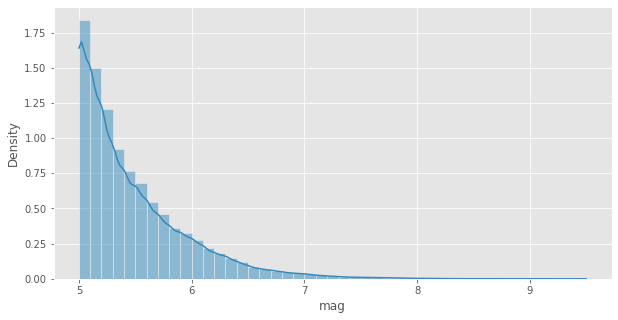

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='mag', stat='density', binwidth=.1, kde=True)
plt.show()

This plot shows the density distribution of earthquake magnitudes since 1900. The distribution is highly skewed to the right, indicating that the majority of earthquakes had a magnitude closer to 5, while only a few are very strong. The plot also reveals that the distribution follows a logarithmic scale, which means that an increase in magnitude by one unit corresponds to a ten-fold increase in the strength of the earthquake. The distribution curve helps us understand the frequency and severity of earthquakes around the world.

# 7. | Density Distribution of Earthquake Depth

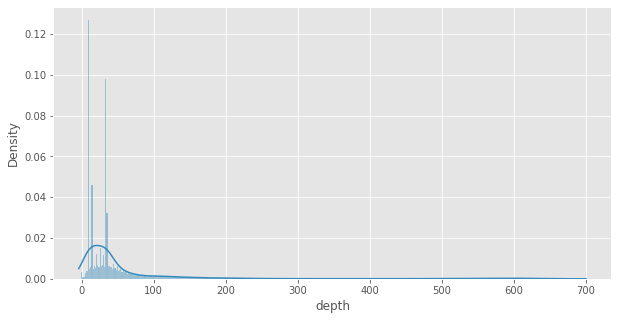

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='depth', stat='density', kde=True)
plt.show()

This plot shows the density distribution of earthquake depths since 1900. The distribution is also highly skewed to the right, indicating that the majority of earthquakes occur at shallow depths, while only a few occur at deeper depths. The plot reveals that most earthquakes occur within the first 100 kilometers of the Earth's crust. However, some regions, such as the Ring of Fire, experience more frequent and stronger earthquakes at greater depths. The distribution curve helps us understand the spatial and temporal patterns of earthquakes around the world.

# 8. | Relationship b/w Magnitude and Depth

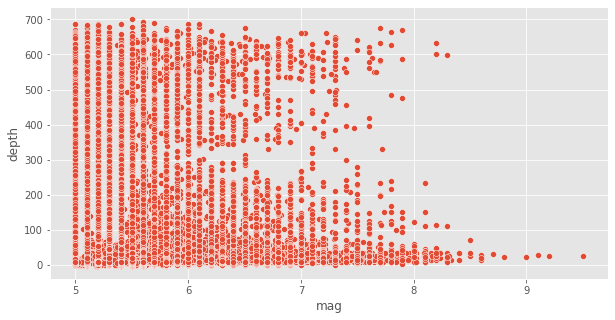

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='mag', y='depth')
plt.show()

This scatter plot shows the relationship between earthquake magnitude and depth for earthquakes with a magnitude greater than 5 since 1900. The plot reveals that there is no clear correlation between magnitude and depth, although most earthquakes with higher magnitudes tend to occur at shallower depths. The plot also shows that the majority of earthquakes fall in the range of low magnitudes and shallow depths, while only a few are strong and occur at greater depths. The plot helps us understand the distribution of earthquakes based on their magnitude and depth.

# 9. | Takeaways

* The frequency of earthquakes has been increasing since the early 1900s, which could be due to better detection technology and population growth in seismically active areas.
* The majority of earthquakes occur at depths less than 70 km, and there is a slight trend of higher magnitude earthquakes being shallower.
* The distribution of earthquake magnitudes follows a power law distribution, meaning there are many small earthquakes and a few very large earthquakes.
* The Pacific Ring of Fire is the most seismically active region in the world, with frequent earthquakes and volcanic activity.
* Earthquakes can have devastating consequences, and it is important to be prepared and have a plan in case of an earthquake.

# 10. | Conclusions

Through analyzing over 100 years of earthquake data, we can gain insight into the patterns and trends of seismic activity around the world. This information can be used to better understand the risks of earthquakes in different regions and to improve earthquake preparedness and response. By sharing these findings and raising awareness about the importance of earthquake safety, we can work towards minimizing the impact of future earthquakes on our communities.

If you found this notebook helpful or informative, I would appreciate if you could leave an upvote or comment to help others find it.